In [1]:
def pas(num):
    for i in range(num+1):
        c=1
        for j in range(1,i+1):
            print(c,end=" ")
            c=int(c*(i-j)/j)
        print("")

In [3]:
pas(4)


1 
1 1 
1 2 1 
1 3 3 1 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Variable	Definition
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

In [41]:
data= pd.read_csv("https://raw.githubusercontent.com/mathubhalan/Black-Friday-Sales/master/Data/BlackFriday.csv")

In [42]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [43]:
data.shape

(537577, 12)

In [44]:
 # Target-- Purchase

 # Data understanding and cleaning
 # EDA
 # Base Model
 # Feature Selection - ANOVA, CHI-SQUARE
 # Try different models
 # Parametric Tuning    - RMSE

In [45]:
# Checking
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [46]:
# Checking the null values in the dataset
data.isnull().sum()/data.shape[0] *100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.062713
Product_Category_3            69.441029
Purchase                       0.000000
dtype: float64

In [47]:
# Only product_category_1 and product_category_2 have null values
# Denoting none of the customers have purchased the product- Let's replace that with '0'
data['Product_Category_2'].fillna(0,inplace=True)
data['Product_Category_3'].fillna(0,inplace=True)

In [48]:
data.isnull().sum()/data.shape[0] *100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

### User_ID                       


Total number of USER_ID:  5891


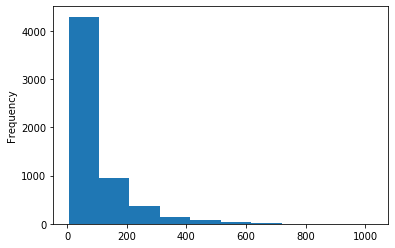

In [49]:
print("Total number of USER_ID: ", data['User_ID'].nunique())
# It seems a repeadted purchases on the same user id as it near to 6000 while the data is for 5 lakhs
# Other possiblitity only 1% have a unique user_id
data['User_ID'].value_counts().plot(kind='hist')

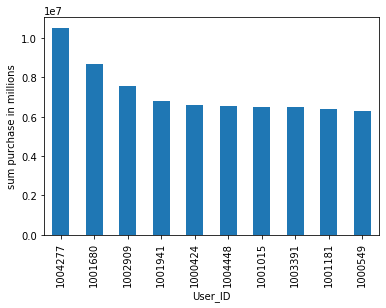

In [50]:
data.groupby(['User_ID'])['Purchase'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel("User_ID")
plt.ylabel("sum purchase in millions")
plt.show()

In [51]:
# We need to target the user-ID "1004277" for more increase in the sales

### Product_ID

Total number of product_id : 3623


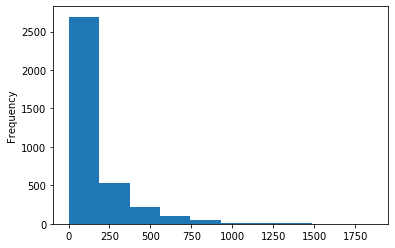

In [52]:
# Product_ID
print("Total number of product_id :",data['Product_ID'].nunique())
data['Product_ID'].value_counts().plot(kind='hist')  # Only certain Product are contributing more

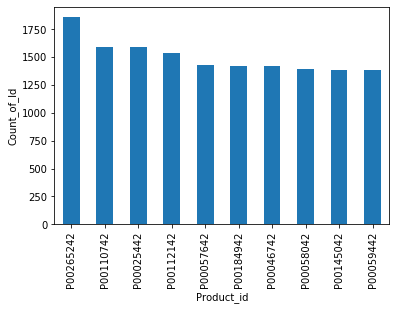

In [53]:
ss= data['Product_ID'].value_counts()[:10]
ss.plot(kind='bar')# Count wise product_id 
plt.xlabel("Product_id")
plt.ylabel("Count_of_Id")
plt.show()

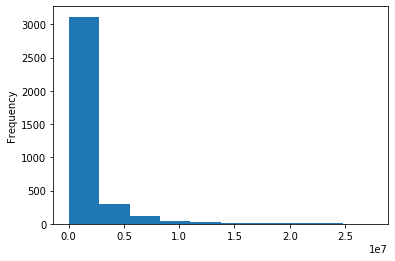

In [54]:
data.groupby(['Product_ID'])['Purchase'].sum().plot(kind='hist')

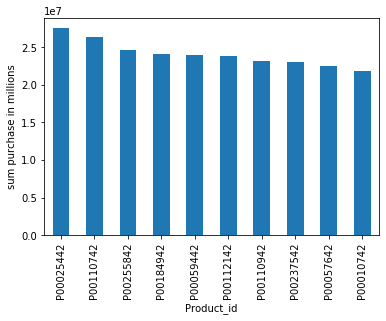

In [55]:
data.groupby(['Product_ID'])['Purchase'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel("Product_id")
plt.ylabel("sum purchase in millions")
plt.show()

Inference:

-Our focus is to increase the price of sales not interest in the count so we need to focus on specific product_id contributing more to the purchases.

### Gender

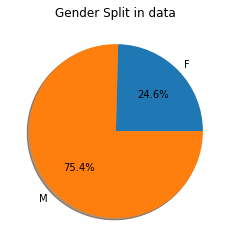

In [56]:
data_Sex = data.groupby('Gender')['Gender'].count()
data_Sex = pd.DataFrame({'Sex':data_Sex.index, 'Count':data_Sex.values})
plt.pie(data_Sex['Count'],labels = data_Sex['Sex'],autopct='%1.1f%%',shadow=True);
plt.title('Gender Split in data');


Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64


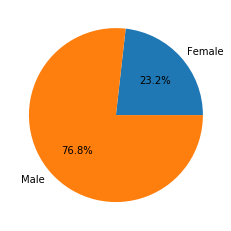

In [57]:
print(data.groupby(['Gender'])['Purchase'].sum())
data_GP=data.groupby(['Gender'])['Purchase'].sum()
plt.pie(data_GP,autopct='%1.1f%%',labels=['Female','Male'])
plt.show()

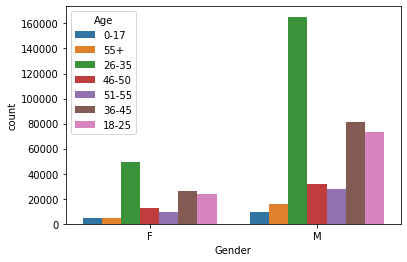

In [58]:
sns.countplot(data['Gender'],hue=data["Age"])

In [59]:
# Count of Male and Purchase sum is high  --- so we need to focus on them more

### Age

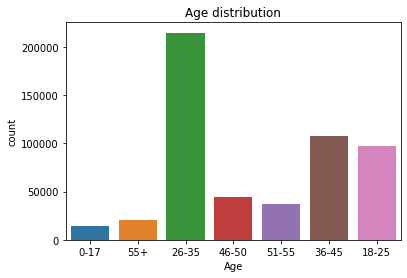

In [60]:
sns.countplot(data['Age'])
plt.title("Age distribution")
plt.show()

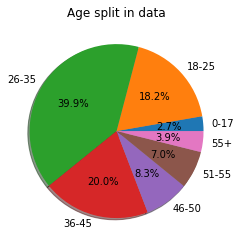

In [61]:
data_Age = data.groupby('Age')['Age'].count()
data_Age = pd.DataFrame({'Age':data_Age.index, 'Count':data_Age.values})
plt.pie(data_Age['Count'],labels = data_Age['Age'],autopct='%1.1f%%',shadow=True);
plt.title('Age split in data');
plt.show()

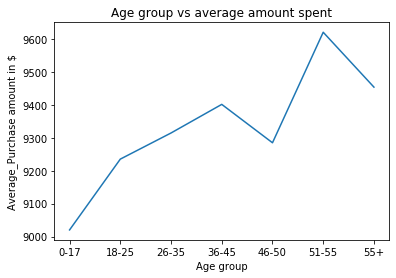

In [62]:
data.groupby('Age')['Purchase'].mean().plot()
plt.xlabel('Age group')
plt.ylabel('Average_Purchase amount in $')
plt.title('Age group vs average amount spent')
plt.show()

In [63]:
### If you observe here the puchase in the age group of 51-55 is comparatively higher with only 7%

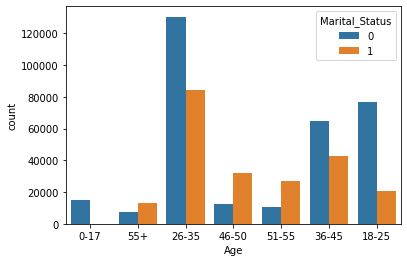

In [64]:
sns.countplot(data['Age'],hue=data["Marital_Status"])
# 1 married and 0 unmarried

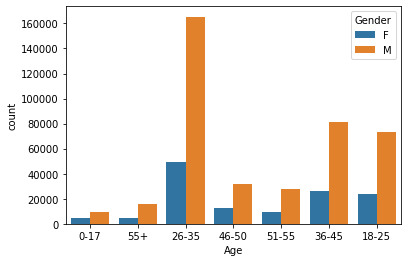

In [65]:
sns.countplot(data['Age'],hue=data["Gender"])

Inference:
- 26-35 age group where they contribute around 40% and sum of their purchases are more even though they are small- (Unmarried)
- While Unmarried are more in the contribution

### City Category

City wise Contribution B    42.132197
C    30.962262
A    26.905541
Name: City_Category, dtype: float64


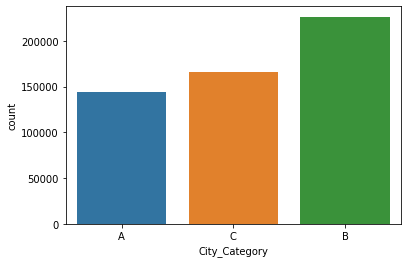

In [129]:
print("City wise Contribution", data['City_Category'].value_counts(normalize=True) *100)
sns.countplot(data['City_Category'])

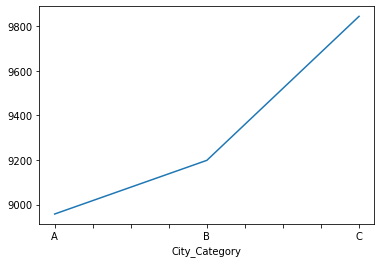

In [135]:
data.groupby('City_Category')['Purchase'].mean().plot()

Inference:
- Even the number of count in the city b is more, purchase wise City C is contributing more.

### Occupation                  

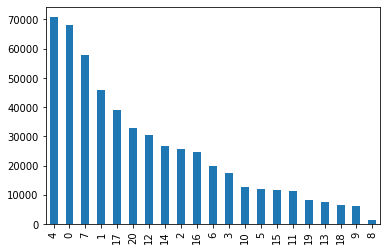

In [66]:
data['Occupation'].value_counts().plot(kind='bar')

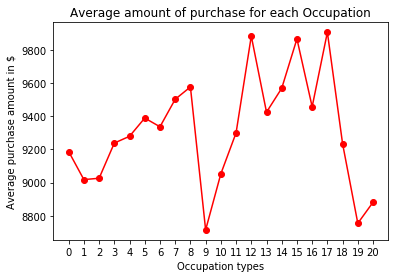

In [67]:
OS= data.groupby(['Occupation'])['Purchase'].mean()
plt.plot(OS.index,OS.values,'ro-')
plt.xticks(OS.index)
plt.xlabel('Occupation types')
plt.ylabel('Average purchase amount in $')
plt.title('Average amount of purchase for each Occupation')
plt.show()

In [68]:
# Inference
# Number of more counts in occuptation doesn't contribute more in the purchase amount
# Mean value of purchase value for occuptation 8 & 15 is more compartievly to the number of counts(Heavy Spenders)
# More effort on the less occupation (8&15) coulld generate more purchases
# Occupation 11 to 18 looks like a target are to focus in terms of raising puchases
# On other hand We can concentrate is there a possiblity of increasing the more count occupation to contribute to purchase

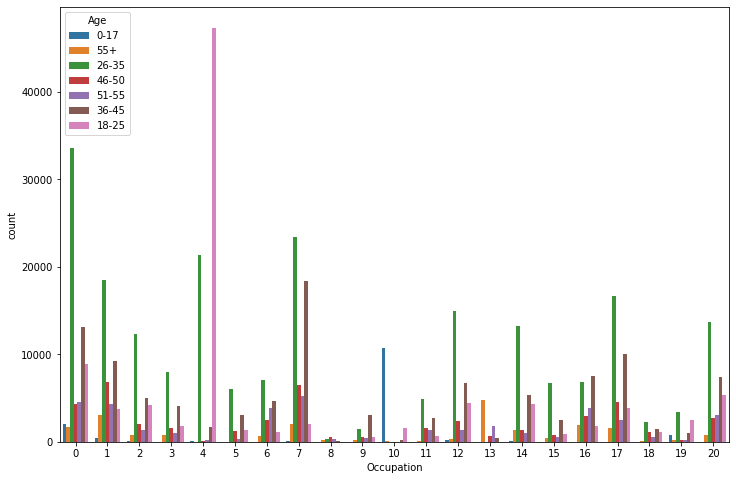

In [69]:
plt.figure(figsize=[12,8])
sns.countplot(data['Occupation'],hue=data["Age"])

Inference
- Occupation 4 which is of more count as more number of youngsters- We can focus on the product of their interest in relation to their occupation
- Age group"26-35" are almost high in every categories as they contribute 40% of the total ages, yet the puchase amount is less if we can attract them we can surely increase the sales by 5-10%

### Stay_In_Current_City_Years

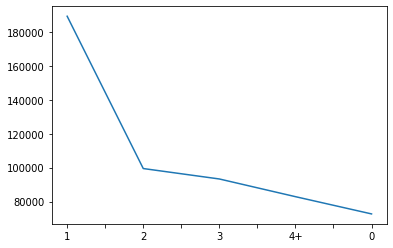

In [70]:
data['Stay_In_Current_City_Years'].value_counts().plot()

In [71]:
data1= data.groupby('Stay_In_Current_City_Years')['Purchase'].sum().reset_index()
data2= data['Stay_In_Current_City_Years'].value_counts()
data2=pd.DataFrame({"Stay_In_Current_City_Years":data2.index, "Count":data2.values})
nw_data = pd.merge(data1,data2,left_on='Stay_In_Current_City_Years',right_on='Stay_In_Current_City_Years',how = 'left');

nw_data = nw_data.sort_values(['Stay_In_Current_City_Years'],ascending=False)[0:10];
nw_data

,Stay_In_Current_City_Years,Purchase,Count
4,4+,774711276,82889
3,3,872531130,93312
2,2,934676626,99459
1,1,1763243917,189192
0,0,672505429,72725


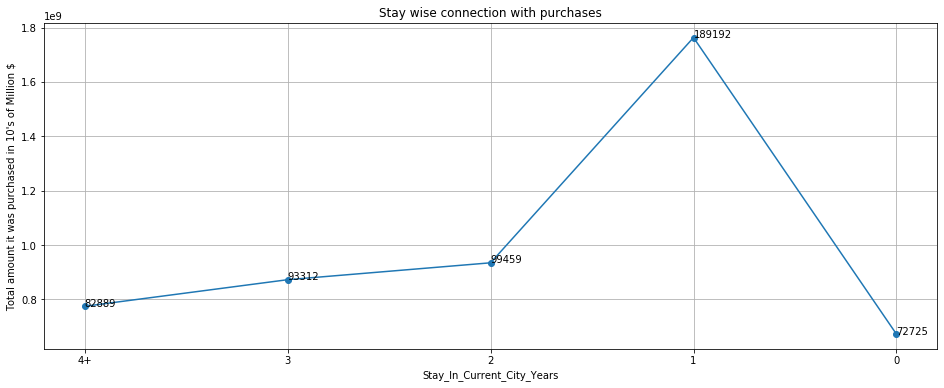

In [72]:
    
plt.figure(figsize=(16,6));
plt.grid();
plt.plot(nw_data['Stay_In_Current_City_Years'],nw_data['Purchase'],'o-');
plt.xlabel('Stay_In_Current_City_Years');
plt.ylabel('Total amount it was purchased in 10\'s of Million $');
plt.title('Stay wise connection with purchases');
for a,b,c in zip(nw_data['Stay_In_Current_City_Years'], nw_data['Purchase'], nw_data['Count']): 
    plt.text(a, b+100000, str(c))  
plt.show();


Inference
- Here you can observe that the person staying 1 year are on the exploration state
- As the stay increases the purchase amount decreases maybe they have got all the stuff needed are we need to understand there requirements

### Marital_Status

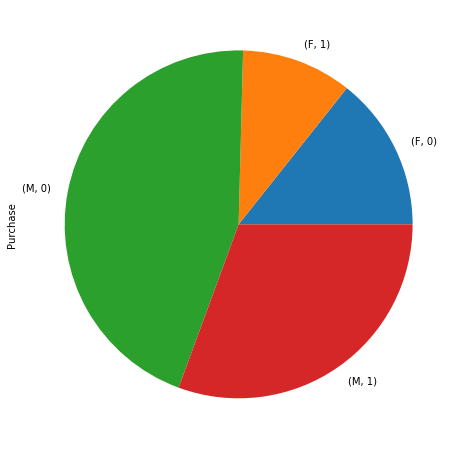

In [73]:
data.groupby(['Gender','Marital_Status'])['Purchase'].count().plot(kind='pie',figsize=(8,8))

Count of martial_status Marital_Status
0    317817
1    219760
Name: Purchase, dtype: int64
Average purchase amount Gender  Marital_Status
F       0                 8753.809299
        1                 8887.751553
M       0                 9518.540223
        1                 9484.617891
Name: Purchase, dtype: float64


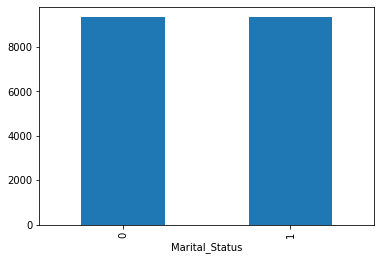

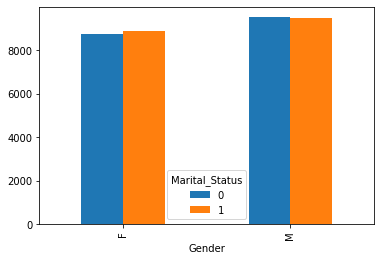

In [74]:
print("Count of martial_status", data.groupby(['Marital_Status'])['Purchase'].count())
print("Average purchase amount", data.groupby(['Gender','Marital_Status'])['Purchase'].mean())
data.groupby(['Marital_Status'])['Purchase'].mean().plot(kind='bar')
data.groupby(['Gender','Marital_Status'])['Purchase'].mean().unstack().plot(kind='bar')
plt.show()


Inference

- Unmarried count is more with both Male and Female genders - Overall purchase amount is same
- No special concentration required, show equal importance

### Product_Categories

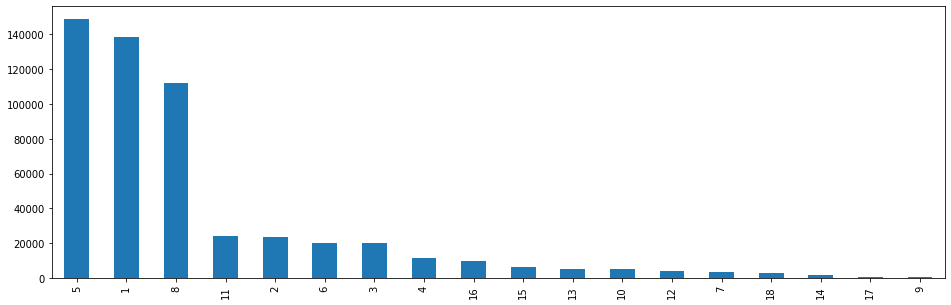

In [75]:
data['Product_Category_1'].value_counts().plot(kind= 'bar', figsize=(16,5))

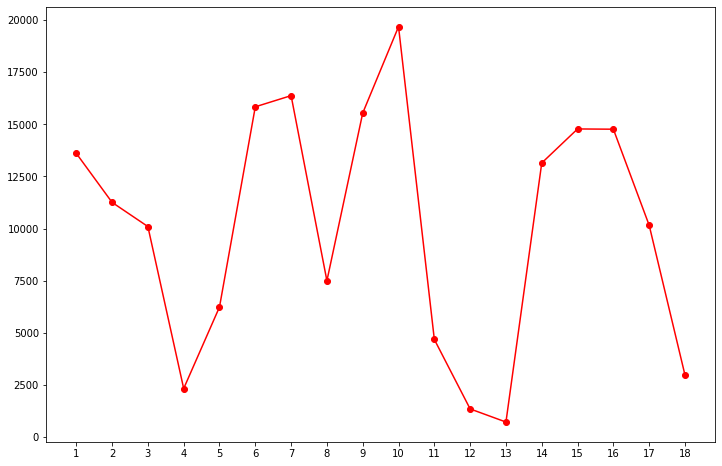

In [76]:
PC1= data.groupby('Product_Category_1')['Purchase'].mean()
plt.figure(figsize=(12,8))
plt.plot(PC1.index,PC1.values,'ro-')
plt.xticks(PC1.index)
plt.show()

Inference:
- Product_catergory_1 ranges from (1000-20000)
- In product catergory 1 --> Count wise (5,1,8) contributes to the most, Purchase Amount wise(10,9,7,6) contribues more
- It may its a costly item 

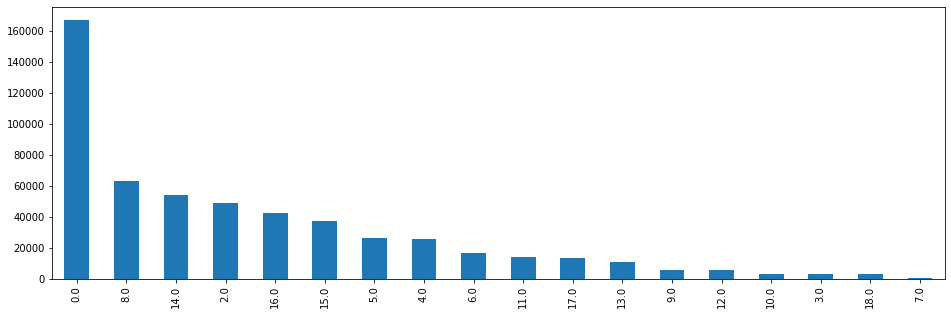

In [79]:
data['Product_Category_2'].value_counts().plot(kind= 'bar', figsize=(16,5))

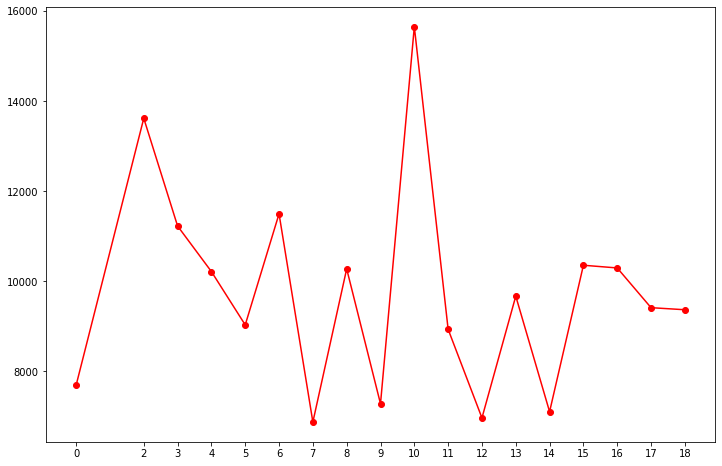

In [80]:
PC2= data.groupby('Product_Category_2')['Purchase'].mean()
plt.figure(figsize=(12,8))
plt.plot(PC2.index,PC2.values,'ro-')
plt.xticks(PC2.index)
plt.show()

Inference:
- Product_catergory_2 ranges from (7000-16000)
- In product_2 category "10" contributes the wide range of purchase amount

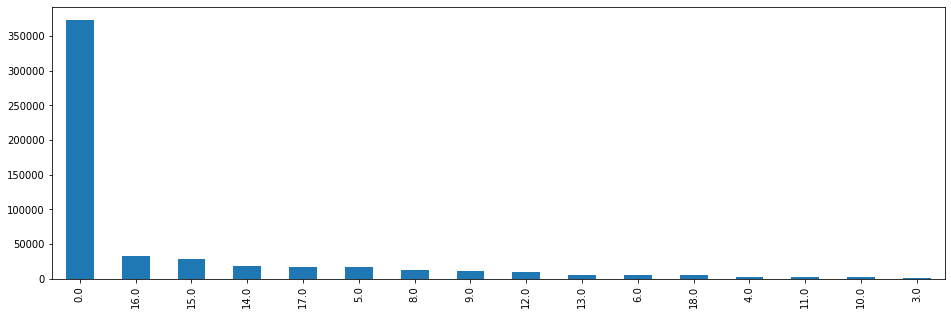

In [83]:
data['Product_Category_3'].value_counts().plot(kind= 'bar', figsize=(16,5))

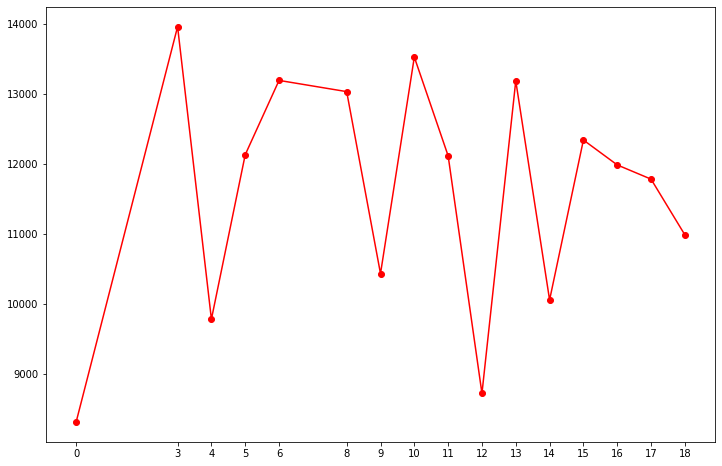

In [84]:
PC3= data.groupby('Product_Category_3')['Purchase'].mean()
plt.figure(figsize=(12,8))
plt.plot(PC3.index,PC3.values,'ro-')
plt.xticks(PC3.index)
plt.show()

Inference:
- Product_catergory_3 ranges from (9000-14000)
- Product_categor_3 have a diverese range of product with the least contribution on "12" check on that.

### Purchases

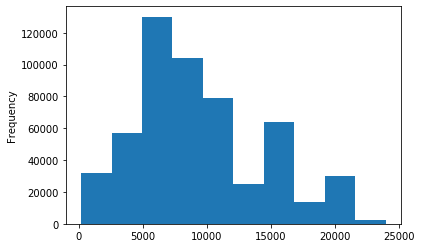

In [112]:
data['Purchase'].plot(kind='hist')

Inference- 
- Purchase peak is arround 5000 and 10000 more in relation to the count

As we can observe there is multicollinearity between product_Catory 1 ,2 and 3

### Preparing the data for the model

In [186]:
# For the base level -- Creating a copy droping the null values
df= data.copy(deep=True)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [188]:
# Product_categories are int
df[['Product_Category_2','Product_Category_3']]=df[['Product_Category_2','Product_Category_3']].astype('int')
# Stay_in_city
df['Stay_In_Current_City_Years'].replace({'4+':4},inplace=True)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('int')

In [189]:
# Gender
df['Gender'].replace({"M":1,"F":0},inplace=True)

In [190]:
# Age
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6

In [191]:
df['Age']=df['Age'].apply(map_age)

In [192]:
# Mapping the User_ID based on the importance for the top 20 rather than excluding them totally
user_ids=df['User_ID']
counts=user_ids.value_counts()
important_counts=set(counts.index[:19])
user_ids=user_ids.map(lambda user_id:user_id if user_id  in important_counts else 0)
from sklearn.preprocessing import OneHotEncoder
user_id_encoder=OneHotEncoder(categories ='auto')
user_id_encoder.fit(user_ids.values.reshape(-1,1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [193]:
def user_id_transform(df):
    uid=df['User_ID'].map(lambda user_id:user_id if user_id  in important_counts else 0).values.reshape(-1,1)
    uid=user_id_encoder.transform(uid).toarray()
    for index,category in enumerate(user_id_encoder.categories_[0]):
        df[str(category)]= uid[:,index]
    df.drop(columns=['User_ID'],inplace=True)
    return df

In [194]:
# Product_ID
product_means=df.groupby(["Product_ID"])["Purchase"].mean()
total_mean=df['Purchase'].mean()

In [195]:
def product_id_transform(df):
    df['Product_guess']=df['Product_ID'].map(lambda pid: product_means.get(pid,total_mean))
    df.drop(columns=['Product_ID'],inplace=True)
    return df


In [196]:
def final_split(df):
    y=df['Purchase'].values
    df.drop(columns=['Purchase'],inplace=True)
    X=df.astype(int).values
    return (X,y)

In [197]:
df= pd.concat([df,pd.get_dummies(df['City_Category'],prefix='City',drop_first=True)],axis=1)

In [199]:
df.drop(['City_Category'],axis=1,inplace=True)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  int64 
 3   Age                         537577 non-null  int64 
 4   Occupation                  537577 non-null  int64 
 5   Stay_In_Current_City_Years  537577 non-null  int32 
 6   Marital_Status              537577 non-null  int64 
 7   Product_Category_1          537577 non-null  int64 
 8   Product_Category_2          537577 non-null  int32 
 9   Product_Category_3          537577 non-null  int32 
 10  Purchase                    537577 non-null  int64 
 11  City_B                      537577 non-null  uint8 
 12  City_C                      537577 non-null  uint8 
dtypes: int32(3), int64(7), object

In [201]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
functions=(user_id_transform,product_id_transform)
transforms=[(function.__name__,FunctionTransformer(function,validate=False,check_inverse=None)) for function in functions]
pipeline=Pipeline(transforms)

In [202]:
train=pipeline.transform(df)
X,y=final_split(train)

In [203]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42,)

In [204]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
params = {'n_estimators':100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 9494010.7002


In [227]:
test=pd.read_csv("test.csv")

In [228]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [229]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [230]:
test.fillna(0,inplace=True)

In [231]:
# Product_categories are int
test[['Product_Category_2','Product_Category_3']]=test[['Product_Category_2','Product_Category_3']].astype('int')
# Stay_in_city
test['Stay_In_Current_City_Years'].replace({'4+':4},inplace=True)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].astype('int')

In [232]:
# Gender
test['Gender'].replace({"M":1,"F":0},inplace=True)

In [233]:
# Age
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6

In [234]:
test['Age']=test['Age'].apply(map_age)

In [235]:
test= pd.concat([test,pd.get_dummies(test['City_Category'],prefix='City',drop_first=True)],axis=1)

In [236]:
test.drop(['City_Category'],axis=1,inplace=True)

In [237]:
productids_submit=test['Product_ID']
userids_submit=test['User_ID']
X_submit=pipeline.transform(test).values
y_submit=clf.predict(X_submit)

In [238]:
submit = pd.DataFrame({'User_ID': userids_submit, 'Product_ID': productids_submit, 'Purchase': y_submit})
submit = submit[['User_ID', 'Product_ID', 'Purchase']]
submit.to_csv("final_solution.csv", index=False)